In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("nba_predictions_data.csv")
df.head()

,Unnamed: 0,ORB%,DRB%,TRB%,AST%,BLK%,AST,STL,BLK,ORB,3P,DBPM,3PAr,3P%,Position
0,12118,0.0,7.4,3.6,24.3,0.4,34.0,2.0,1.0,0.0,2.0,-3.9,0.250,0.250,1
1,10058,4.3,7.1,5.6,11.7,0.2,84.0,62.0,3.0,52.0,10.0,-2.7,0.049,0.303,1
2,10478,3.2,7.1,5.2,24.0,0.6,59.0,16.0,4.0,10.0,1.0,-1.7,0.038,0.167,1
3,14727,2.2,9.6,5.9,12.8,0.7,104.0,33.0,15.0,29.0,15.0,-1.6,0.064,0.385,1
4,14380,5.1,8.5,6.8,6.5,1.7,30.0,25.0,18.0,35.0,37.0,-1.1,0.527,0.381,1


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
print(df.columns)
print(df.shape)

Index(['ORB%', 'DRB%', 'TRB%', 'AST%', 'BLK%', 'AST', 'STL', 'BLK', 'ORB',
       '3P', 'DBPM', '3PAr', '3P%', 'Position'],
      dtype='object')
(11571, 14)


In [6]:
## Scaling the data and preparing them for the algorithms
X = df.drop(columns = ['Position'], axis=1)
print(X.shape)
Y = df["Position"]
print(Y.shape)

(11571, 13)
(11571,)


In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:1]

array([[-1.28205491, -0.97654141, -1.30696677,  1.29216342, -0.57358119,
        -0.55370164, -0.98407223, -0.66011379, -0.91925004, -0.56304477,
        -1.46583518,  0.34880394,  0.17955228]])

In [8]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9256, 13) (9256,)
Test set: (2315, 13) (2315,)


In [9]:
## Let's start with the K Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
k_neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
k_neighbor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
## Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, k_neighbor.predict(X_train)))

Train set Accuracy:  0.8587942955920485


In [11]:
## The model looks better than before but let's check the validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(k_neighbor, X_train, y_train, cv=5, scoring="accuracy")
scores

array([0.7338013 , 0.72987574, 0.7271745 , 0.73635873, 0.73851972])

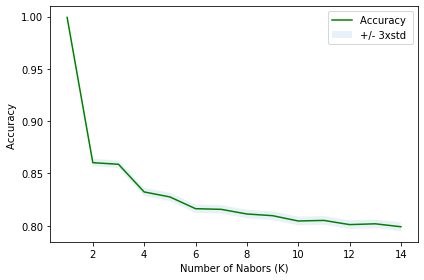

In [12]:
## The KNN model with K=3 is overfitting let's try some other K in order to make it more complicated
## Try 15 different K
import numpy as np
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_train, yhat)

    
    std_acc[n-1]=np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [14]:
k_neighbor_14 = KNeighborsClassifier(n_neighbors = 14).fit(X_train,y_train)
k_neighbor_14

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [15]:
scores = cross_val_score(k_neighbor_14, X_train, y_train, cv=5, scoring="accuracy")
scores

array([0.76079914, 0.77417612, 0.76985413, 0.77039438, 0.76715289])

In [19]:
## F1 scores
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_pred = cross_val_predict(k_neighbor_14, X_train, y_train,cv=5)
f1_score(y_train, y_train_pred, average=None)

array([0.8112932 , 0.67145365, 0.82505755])

In [20]:
## let's now train a Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred=(bag_clf.predict(X_train))
y_pred

array([2, 1, 2, ..., 2, 3, 1], dtype=int64)

In [22]:
## Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, y_pred))

Train set Accuracy:  0.7764693171996543


In [23]:
scores = cross_val_score(bag_clf, X_train, y_train, cv=5, scoring="accuracy")
scores

array([0.76673866, 0.77471637, 0.77363587, 0.7806591 , 0.75796867])

In [24]:
y_train_pred = cross_val_predict(bag_clf, X_train, y_train,cv=5)

In [25]:
## f1 scores
f1_score(y_train, y_train_pred, average=None)

array([0.81379081, 0.67521774, 0.82577103])

In [26]:
## I have two models with more or less the same accuracy, in this case a voting classifier could be a good strategy to create a stronger classifier 
from sklearn.ensemble import VotingClassifier

In [27]:
eclf1 = VotingClassifier(estimators=[('KNN', k_neighbor_14), ('rf', bag_clf)], voting='soft')
eclf1

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=14,
                                                   p=2, weights='uniform')),
                             ('rf',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                  

In [40]:
from sklearn.metrics import accuracy_score
for clf in (k_neighbor_14, bag_clf, eclf1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_train, eclf1.predict(X_train)))

KNeighborsClassifier 0.7972126188418324
BaggingClassifier 0.7972126188418324
VotingClassifier 0.7985090751944685


In [48]:
scores = cross_val_score(eclf1, X_train, y_train, cv=5, scoring="accuracy")
scores

array([0.7737581 , 0.77903836, 0.78011885, 0.78227985, 0.77147488])

In [49]:
y_train_pred = eclf1.predict(X_train)

In [50]:
## f1 scores 
y_test_pred = eclf1.predict(X_train)
f1_score(y_train, y_train_pred, average=None)

array([0.83494176, 0.71584613, 0.84753436])

In [51]:
## Finally, it's the time to evaluate the model using the training data
yhat =eclf1.predict(X_test)
yhat[0:5]

array([3, 2, 2, 1, 3], dtype=int64)

In [52]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.772354211663067


In [53]:
f1_score(y_test, yhat, average=None)

array([0.80261438, 0.68184693, 0.83607637])

In [54]:
## Save the model
import pickle

with open("pos_classification_pred.pkl", "wb") as f:
     pickle.dump(eclf1,f)

In [56]:
## Load the model
with open("pos_classification_pred.pkl", "rb") as f:
    loaded_lasso = pickle.load(f)